In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
#import chartify
from sklearn.utils import shuffle
#import graphlab
import warnings
warnings.filterwarnings('ignore')#, category=DeprecationWarning) 


#from keras.models import Sequential
#from keras.layers import Dense
#from keras.preprocessing.sequence import pad_sequences
#from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
#from keras.models import Model
##from keras.utils import to_categorical
#from keras.callbacks import ModelCheckpoint

#from sklearn.model_selection import KFold
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import cross_val_score

#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn import ensemble
#from sklearn import datasets
#from sklearn.utils import shuffle
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
#np.random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

/anaconda/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


**Setting path for data files**

In [76]:
path1 = '/Users/junaidqazi-13/Desktop/_SFU_MS_BigData/Sem_1/ML_726_SFU/Data_ML_Proj'
path = path1+'/green_clean_2017_1.csv'
path_weather = path1+'/nyc_weather_2017.csv'
path_weather

'/Users/junaidqazi-13/Desktop/_SFU_MS_BigData/Sem_1/ML_726_SFU/Data_ML_Proj/nyc_weather_2017.csv'

## Exploring weather data

In [77]:
dfw = pd.read_csv(path_weather)

In [78]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
STATION            365 non-null object
NAME               365 non-null object
DATE               365 non-null object
TAVG               0 non-null float64
TAVG_ATTRIBUTES    0 non-null float64
TMAX               365 non-null int64
TMAX_ATTRIBUTES    365 non-null object
TMIN               365 non-null int64
TMIN_ATTRIBUTES    365 non-null object
WT01               146 non-null float64
WT01_ATTRIBUTES    146 non-null object
WT02               13 non-null float64
WT02_ATTRIBUTES    13 non-null object
WT03               0 non-null float64
WT03_ATTRIBUTES    0 non-null float64
WT04               1 non-null float64
WT04_ATTRIBUTES    1 non-null object
WT06               1 non-null float64
WT06_ATTRIBUTES    1 non-null object
WT08               66 non-null float64
WT08_ATTRIBUTES    66 non-null object
dtypes: float64(9), int64(2), object(10)
memory usage: 60.0+ KB


### getting list of all the columns

In [79]:
dfw.columns

Index(['STATION', 'NAME', 'DATE', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX',
       'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES',
       'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES', 'WT08',
       'WT08_ATTRIBUTES'],
      dtype='object')

### dropping the once with missing data

In [80]:
dfw = dfw[['STATION', 'NAME', 'DATE', 'TMAX',
       'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES']]

In [81]:
dfw.head()

,STATION,NAME,DATE,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WT01,WT01_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-01,48,",,W",40,",,W",NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-02,41,",,W",37,",,W",1.0,",,W"
2,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-03,43,",,W",39,",,W",1.0,",,W"
3,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-04,52,",,W",34,",,W",1.0,",,W"
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-05,34,",,W",27,",,W",NaN,NaN


In [82]:
dfw.count()

STATION            365
NAME               365
DATE               365
TMAX               365
TMAX_ATTRIBUTES    365
TMIN               365
TMIN_ATTRIBUTES    365
WT01               146
WT01_ATTRIBUTES    146
dtype: int64

In [83]:
# Lets check the unique values in attributes!

In [84]:
dfw.TMAX_ATTRIBUTES.nunique(), dfw.TMIN_ATTRIBUTES.nunique(), dfw.WT01.nunique(), dfw.WT01_ATTRIBUTES.nunique()

(1, 1, 1, 1)

So, we don't want these columns as well. They are always 1.<br>
`TMAX_ATTRIBUTES, TMIN_ATTRIBUTES, WT01, WT01_ATTRIBUTES` Let's drop them!

In [85]:
dfw = dfw.drop(['TMAX_ATTRIBUTES', 
                'TMIN_ATTRIBUTES', 
                'WT01', 'WT01_ATTRIBUTES'], axis = 1)

In [86]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
STATION    365 non-null object
NAME       365 non-null object
DATE       365 non-null object
TMAX       365 non-null int64
TMIN       365 non-null int64
dtypes: int64(2), object(3)
memory usage: 14.3+ KB


In [87]:
#its easier to have date columns with same name for joining
dfw['date'] = dfw['DATE']
dfw.drop(['DATE'], axis =1, inplace = True)

In [88]:
dfw.head()

,STATION,NAME,TMAX,TMIN,date
0,USW00094728,"NY CITY CENTRAL PARK, NY US",48,40,2017-01-01
1,USW00094728,"NY CITY CENTRAL PARK, NY US",41,37,2017-01-02
2,USW00094728,"NY CITY CENTRAL PARK, NY US",43,39,2017-01-03
3,USW00094728,"NY CITY CENTRAL PARK, NY US",52,34,2017-01-04
4,USW00094728,"NY CITY CENTRAL PARK, NY US",34,27,2017-01-05


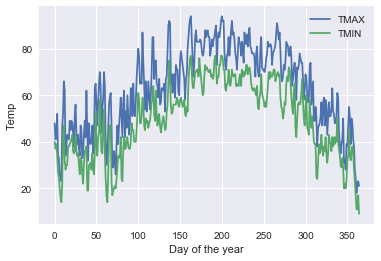

In [105]:
plt.plot(dfw.TMAX), plt.plot(dfw.TMIN)
plt.xlabel('Day of the year')
plt.ylabel('Temp')
plt.legend()

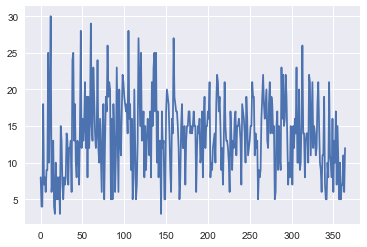

In [109]:
plt.plot(dfw.TMAX-dfw.TMIN)

**No solid trend in the temp difference.....no need to consider**

In [174]:
dfw.columns

Index(['STATION', 'NAME', 'TMAX', 'TMIN', 'date'], dtype='object')

In [175]:
#so we need only date and TMAX
dfw = dfw[['date', 'TMAX']]

In [176]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
date    365 non-null object
TMAX    365 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


### Checking already cleaned nyc taxi data

In [136]:
dft = pd.read_csv(path)

In [137]:
#df['poi-1']/83
dft.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,PUT,DOT,date
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2,1.0,1,11:07:56,11:13:00,2017-01-06
1,1,1,95,95,1,0.70,4.0,0.5,0.5,1.30,0.0,0.3,6.60,1,1.0,1,04:00:07,04:02:34,2017-05-18
2,2,1,196,56,5,0.87,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1.0,1,22:59:17,23:03:47,2017-02-21
3,2,1,65,225,2,4.65,20.5,1.0,0.5,4.46,0.0,0.3,26.76,1,1.0,1,19:05:09,19:32:57,2017-12-22
4,2,1,82,95,5,2.17,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2,1.0,1,06:21:34,06:29:59,2017-11-12


In [138]:
dft['PickUp_hr'] = pd.to_datetime(dft['PUT']).dt.hour
#df.PUT[0]

In [143]:
dft.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,PUT,DOT,date,PickUp_hr
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2,1.0,1,11:07:56,11:13:00,2017-01-06,11
1,1,1,95,95,1,0.70,4.0,0.5,0.5,1.30,0.0,0.3,6.60,1,1.0,1,04:00:07,04:02:34,2017-05-18,4
2,2,1,196,56,5,0.87,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1.0,1,22:59:17,23:03:47,2017-02-21,22
3,2,1,65,225,2,4.65,20.5,1.0,0.5,4.46,0.0,0.3,26.76,1,1.0,1,19:05:09,19:32:57,2017-12-22,19
4,2,1,82,95,5,2.17,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2,1.0,1,06:21:34,06:29:59,2017-11-12,6


In [144]:
dft.count()

VendorID                 2314057
RatecodeID               2314057
PULocationID             2314057
DOLocationID             2314057
passenger_count          2314057
trip_distance            2314057
fare_amount              2314057
extra                    2314057
mta_tax                  2314057
tip_amount               2314057
tolls_amount             2314057
improvement_surcharge    2314057
total_amount             2314057
payment_type             2314057
trip_type                2314051
dispatch                 2314057
PUT                      2314057
DOT                      2314057
date                     2314057
PickUp_hr                2314057
dtype: int64

In [145]:
dfw.count()

STATION    365
NAME       365
TMAX       365
TMIN       365
date       365
dtype: int64

## merging the data on date

In [177]:
df=dft.merge(dfw, on='date')

In [178]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
dtype: int64

## So now we have a combined `dataframe` with weather and taxi related stuff in `df`

In [179]:
# In case there is an null value!
df.dropna();

In [180]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
dtype: int64

In [181]:
df.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'dispatch', 'PUT', 'DOT', 'date',
       'PickUp_hr', 'TMAX'],
      dtype='object')

In [185]:
df.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,PUT,DOT,date,PickUp_hr,TMAX
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.0,...,0.3,7.3,2,1.0,1,11:07:56,11:13:00,2017-01-06,11,33
1,2,1,65,217,1,2.90,14.5,0.0,0.5,0.0,...,0.3,15.3,2,1.0,1,11:01:58,11:20:35,2017-01-06,11,33
2,2,1,168,74,2,1.51,9.5,0.0,0.5,0.0,...,0.3,10.3,2,1.0,1,14:03:08,14:15:02,2017-01-06,14,33
3,2,1,173,129,1,1.00,6.0,0.5,0.5,1.0,...,0.3,8.3,1,1.0,1,06:01:10,06:06:28,2017-01-06,6,33
4,2,1,181,91,6,4.77,16.5,0.5,0.5,0.0,...,0.3,17.8,2,1.0,1,22:15:13,22:32:26,2017-01-06,22,33


In [188]:
df['day'] = pd.to_datetime(df['date']).dt.day

In [190]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [200]:
#maming sure we have all the (max month day 31) days and all the month (12 months)
df.day.nunique(), df.month.nunique()

(31, 12)

In [205]:
df.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'dispatch', 'PUT', 'DOT', 'date',
       'PickUp_hr', 'TMAX', 'day', 'month'],
      dtype='object')

In [72]:
#df3=df.merge(dfw, on='date')

In [75]:
#df3.describe()

'PULocationID' ===> pick up zone <br>
'DOLocationID' ===> drop off zone <br>
Considering pick up only

In [206]:
working_df = df[['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'dispatch', 
       'PickUp_hr', 'TMAX', 'day', 'month']]

In [207]:
del df

In [208]:
working_df['zone'] = working_df[['PULocationID']]

In [209]:
working_df.drop('PULocationID', inplace=True, axis = 1)
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314019 entries, 0 to 2314018
Data columns (total 20 columns):
VendorID                 int64
RatecodeID               int64
DOLocationID             int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dispatch                 int64
PickUp_hr                int64
TMAX                     int64
day                      int64
month                    int64
zone                     int64
dtypes: float64(9), int64(11)
memory usage: 450.7 MB


In [210]:
working_df.dropna();

In [211]:
working_df.isnull().count()

VendorID                 2314019
RatecodeID               2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314019
dispatch                 2314019
PickUp_hr                2314019
TMAX                     2314019
day                      2314019
month                    2314019
zone                     2314019
dtype: int64

In [212]:
col_mask=working_df.isnull().any(axis=0) 
col_mask

VendorID                 False
RatecodeID               False
DOLocationID             False
passenger_count          False
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
payment_type             False
trip_type                 True
dispatch                 False
PickUp_hr                False
TMAX                     False
day                      False
month                    False
zone                     False
dtype: bool

So, we have some NaN in trip_type!<br>

In [213]:
working_df.trip_type.value_counts()#.sum()

1.0    2271530
2.0      42483
Name: trip_type, dtype: int64

So there are 6 NaN in `trip_type`<br>
Let's fill them with 1.0 as we have more 1's

In [214]:
working_df.trip_type.fillna(value=1.0, inplace=True)
col_mask=working_df.isnull().any(axis=0) 
col_mask
#.value_counts().sum()

VendorID                 False
RatecodeID               False
DOLocationID             False
passenger_count          False
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
payment_type             False
trip_type                False
dispatch                 False
PickUp_hr                False
TMAX                     False
day                      False
month                    False
zone                     False
dtype: bool

In [215]:
working_df.zone.nunique()#value_counts()

258

In [216]:
grouped = working_df.groupby('zone').count()

In [217]:
#grouped.head()
#grouped.index
"""
zone_list = grouped[
    (grouped['VendorID']>130000) | 
    ((grouped['VendorID']<100000) & (grouped['VendorID']>90000)) |
    ((grouped['VendorID']<70000) & (grouped['VendorID']>60000)) |
    ((grouped['VendorID']<50000) & (grouped['VendorID']>40000)) |
    ((grouped['VendorID']<30000) & (grouped['VendorID']>25000)) |
    ((grouped['VendorID']<10000) & (grouped['VendorID']>8000))   
].index
zone_list
"""
zone_list = grouped[(grouped['VendorID']>30000)].index
zone_list

Int64Index([  7,  25,  33,  41,  42,  49,  65,  66,  74,  75,  82,  95,  97,
            112, 116, 129, 130, 145, 166, 181, 223, 244, 255, 256, 260],
           dtype='int64', name='zone')

In [218]:
#grouped.sort_values(by='VendorID').tail(50)

There was a problem with missing zones while train test spit, I selected the zones with higher ride demand

In [219]:
#zone_list = [82,7,75,41,74]
#zone_list = [74, 255, 244, 130, 49, 260, 116, 61, 40, 247, 196]

In [220]:
#df82 = working_df[working_df.zone == 82]
#df7 = working_df[working_df.zone == 7]
#df75 = working_df[working_df.zone == 75]
#df41 = working_df[working_df.zone == 41]
#df74 = working_df[working_df.zone == 74]

"""
df74 = working_df[working_df.zone == 74]
df255 = working_df[working_df.zone == 255]
df244 = working_df[working_df.zone == 244]
df130 = working_df[working_df.zone == 130]
df49 = working_df[working_df.zone == 49]

df260 = working_df[working_df.zone == 260]
df116 = working_df[working_df.zone == 116]
df61 = working_df[working_df.zone == 61]
df40 = working_df[working_df.zone == 40]
df247 = working_df[working_df.zone == 247]
"""
df2 = working_df[working_df.zone.isin(zone_list)]

In [221]:
#frames = [df82, df7, df75, df41,df74]
#frames = [df74, df255, df244, df130, df49, df260, df116, df61, df40, df247]

In [222]:
#df2 = pd.concat(frames)

In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726026 entries, 0 to 2314018
Data columns (total 20 columns):
VendorID                 int64
RatecodeID               int64
DOLocationID             int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dispatch                 int64
PickUp_hr                int64
TMAX                     int64
day                      int64
month                    int64
zone                     int64
dtypes: float64(9), int64(11)
memory usage: 276.5 MB


In [224]:
# Checking for NaN
col_mask=df2.isnull().any(axis=0) 
col_mask

VendorID                 False
RatecodeID               False
DOLocationID             False
passenger_count          False
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
payment_type             False
trip_type                False
dispatch                 False
PickUp_hr                False
TMAX                     False
day                      False
month                    False
zone                     False
dtype: bool

In [233]:
save_path = path1+'/nyc_for_ann.csv'
save_path

'/Users/junaidqazi-13/Desktop/_SFU_MS_BigData/Sem_1/ML_726_SFU/Data_ML_Proj/nyc_for_ann.csv'

In [234]:
# Created test data with fewer zones
#df2.to_csv(save_path, index=False)

In [235]:
X = df2.drop('zone',axis=1)
y = df2['zone']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [237]:
y_train.nunique(), y_test.nunique()

(25, 25)

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
# Creating instance and fitting the model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
# doing predictions
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
# Evaluation
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

### Training test one without TMAX, day, month features

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
# Evaluation
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           7       0.56      0.63      0.59     35681
          25       0.23      0.21      0.22     18053
          33       0.32      0.34      0.33     18138
          41       0.36      0.36      0.36     39617
          42       0.30      0.27      0.28     24546
          49       0.30      0.22      0.25     10633
          65       0.22      0.18      0.20     14878
          66       0.37      0.40      0.38     14698
          74       0.46      0.50      0.48     42614
          75       0.52      0.55      0.53     36998
          82       0.44      0.48      0.46     30520
          95       0.64      0.64      0.64     18047
          97       0.31      0.32      0.31     21909
         112       0.31      0.24      0.27     10131
         116       0.31      0.23      0.26     10655
         129       0.34      0.31      0.32     19151
         130       0.64      0.60      0.62      9251
         145       0.51    

In [106]:
#plt.plot(rfc_pred-y_test)

## Rough work

In [110]:
df2.zone.value_counts()

74    142074
41    131015
75    123685
7     118351
82    101741
Name: zone, dtype: int64

In [39]:
#X_train, X_test = train_test_split(
#    working_df, test_size=0.10, random_state=42)

In [42]:
#X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231406 entries, 583421 to 1253288
Data columns (total 16 columns):
VendorID                 231406 non-null int64
RatecodeID               231406 non-null int64
passenger_count          231406 non-null int64
trip_distance            231406 non-null float64
fare_amount              231406 non-null float64
extra                    231406 non-null float64
mta_tax                  231406 non-null float64
tip_amount               231406 non-null float64
tolls_amount             231406 non-null float64
improvement_surcharge    231406 non-null float64
total_amount             231406 non-null float64
payment_type             231406 non-null int64
trip_type                231406 non-null float64
dispatch                 231406 non-null int64
PickUp_hr                231406 non-null int64
zone                     231406 non-null int64
dtypes: float64(9), int64(7)
memory usage: 30.0 MB


In [43]:
#X_test.to_csv('nyc_for_ann.csv', index=False)

In [45]:
X_test.zone.nunique()

243

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [46]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(243, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [61]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=2, batch_size=5, verbose=0)

In [62]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
kfold

KFold(n_splits=10, random_state=101, shuffle=True)

In [65]:
results = cross_val_score(estimator, X_test, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

NameError: name 'dummy_y' is not defined

In [17]:
(working_df.count() - working_df.trip_type.value_counts().sum())['VendorID']

6

So there are 6 NaN in `trip_type`<br>
Let's fill them with 1.0 as we have more 1's

In [18]:
working_df.trip_type.fillna(value=1.0, inplace=True)
col_mask=working_df.isnull().any(axis=0) 
col_mask
#.value_counts().sum()

VendorID                 False
RatecodeID               False
passenger_count          False
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
payment_type             False
trip_type                False
dispatch                 False
PickUp_hr                False
zone                     False
dtype: bool

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = working_df.drop('zone',axis=1)
y = working_df['zone']

In [21]:
#X = X.as_matrix().astype(np.float)
#y = y.as_matrix().astype(np.float)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [76]:
(X_train.zone.unique()== X_test.zone.unique())

False

In [79]:
X_test.zone.nunique()

243

In [174]:
a=[82,7,75,41,74]

In [175]:
test_df = working_df[working_df.zone.isin(a)]

In [176]:
test_df.zone.value_counts()

74    142074
41    131015
75    123685
7     118351
82    101741
Name: zone, dtype: int64